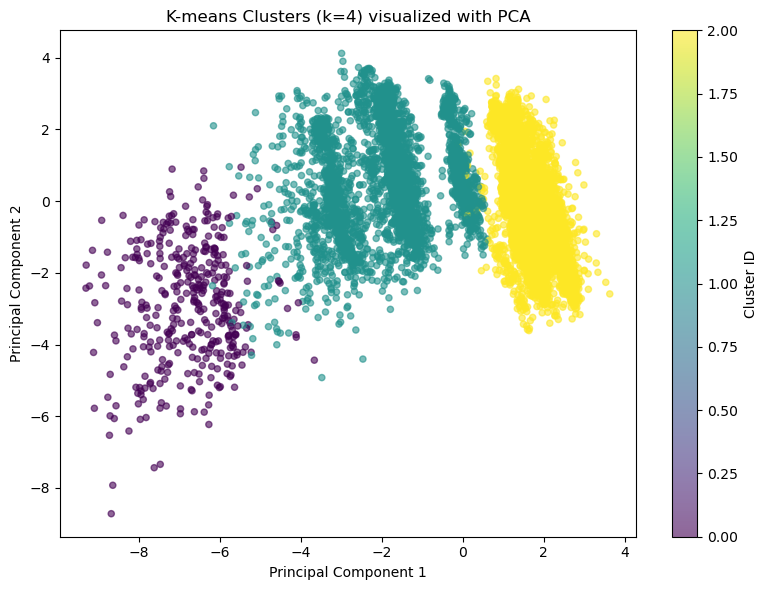

               age  avg_duration  avg_campaign  avg_emp_var_rate  \
cluster                                                            
0        41.459948    304.700258      1.801034         -2.108269   
1        39.685106    259.285372      2.089096         -1.595160   
2        40.140953    258.974201      2.921408          1.291440   

         avg_cons_conf  avg_euribor3m  avg_nr_employed     %_yes          job  \
cluster                                                                         
0           -38.088372       1.002044      5032.541602  0.607235       admin.   
1           -42.981809       1.852965      5104.980691  0.160106       admin.   
2           -39.035862       4.919255      5215.590894  0.049718  blue-collar   

                 education  marital housing loan  
cluster                                           
0        university.degree  married     yes   no  
1        university.degree  married     yes   no  
2        university.degree  married     yes   no 

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("bank-additional-full.csv", sep=';')

X = df.drop(columns=['y'])

X_enc = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_enc)

np.random.seed(42)
sample_idx = np.random.choice(X_scaled.shape[0], size=10000, replace=False)
X_sample = X_scaled[sample_idx]
df_sample = df.iloc[sample_idx].copy()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_sample)

pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_sample)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=20)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clusters (k=4) visualized with PCA")
plt.colorbar(scatter, label='Cluster ID')
plt.tight_layout()
plt.show()

df_sample['cluster'] = clusters
df_sample['y_binary'] = (df_sample['y'] == 'yes').astype(int)

cluster_profiles = df_sample.groupby('cluster').agg({
    'age': 'mean',
    'duration': 'mean',
    'campaign': 'mean',
    'emp.var.rate': 'mean',
    'cons.conf.idx': 'mean',
    'euribor3m': 'mean',
    'nr.employed': 'mean',
    'y_binary': 'mean',
    'job': lambda x: x.mode()[0],
    'education': lambda x: x.mode()[0],
    'marital': lambda x: x.mode()[0],
    'housing': lambda x: x.mode()[0],
    'loan': lambda x: x.mode()[0],
}).rename(columns={
    'y_binary': '%_yes',
    'duration': 'avg_duration',
    'campaign': 'avg_campaign',
    'emp.var.rate': 'avg_emp_var_rate',
    'cons.conf.idx': 'avg_cons_conf',
    'euribor3m': 'avg_euribor3m',
    'nr.employed': 'avg_nr_employed'
})

print(cluster_profiles)


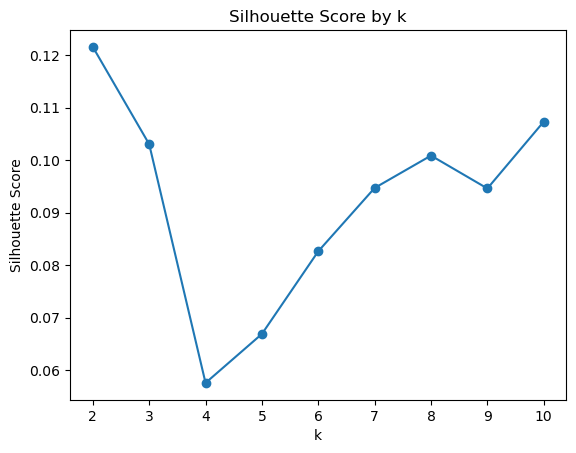

In [43]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score by k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()


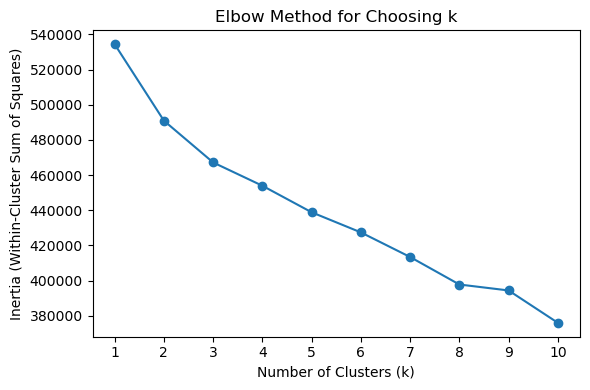

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different k values
inertias = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_sample)
    inertias.append(km.inertia_)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for Choosing k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(k_range)
plt.tight_layout()
plt.show()